<a href="https://colab.research.google.com/github/MaggieJian/Final-AI-Coursework/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

Unsupervised learning techniques for classification tasks are exceptionally adept at identifying patterns and categorising data when the classifications are not explicitly labeled.

The tasks in this notebook will focus on the discrimination of urban areas and areas of greenery based on image classification based on Sentinel-2 optical data.


# List of contents

* Introduction to K-means Clustering Image Classification
* K-Means Implementation

In [1]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Check your Drive has the right Sentinel-2 file that ends with '.SAFE'
! ls /content/drive/MyDrive/AI4EO/Sentinel-2_file/

S2B_MSIL1C_20240509T031519_N0510_R118_T48NUG_20240509T054534.SAFE


## Introduction to K-means Clustering Image Classification

K-means clustering is a type of unsupervised learning algorithm used for partitioning a dataset into a set of k groups (or clusters), where k represents the number of groups pre-specified by the analyst. It classifies the data points based on the similarity of the features of the data [M+67]. The basic idea is to define k centroids, one for each cluster, and then assign each data point to the nearest centroid, while keeping the centroids as small as possible.

K-means clustering is particularly well-suited for applications where:

* The structure of the data is not known beforehand: K-means doesn’t require any prior knowledge about the data distribution or structure, making it ideal for exploratory data analysis.
* Simplicity and scalability: The algorithm is straightforward to implement and can scale to large datasets relatively easily.

Key Components of K-means:
* Choosing K: The number of clusters (k) is a parameter that needs to be specified before applying the algorithm.
* Centroids Initialization: The initial placement of the centroids can affect the final results.
* Assignment Step: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
* Update Step: The centroids are recomputed as the center of all the data points assigned to the respective cluster.

The Iterative Process of K-means:
The assignment and update steps are repeated iteratively until the centroids no longer move significantly, meaning the within-cluster variation is minimised. This iterative process ensures that the algorithm converges to a result, which might be a local optimum.

Advantages of K-means:
* Efficiency: K-means is computationally efficient.
* Ease of interpretation: The results of k-means clustering are easy to understand and interpret.

In [3]:
# Install dependancies
! pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


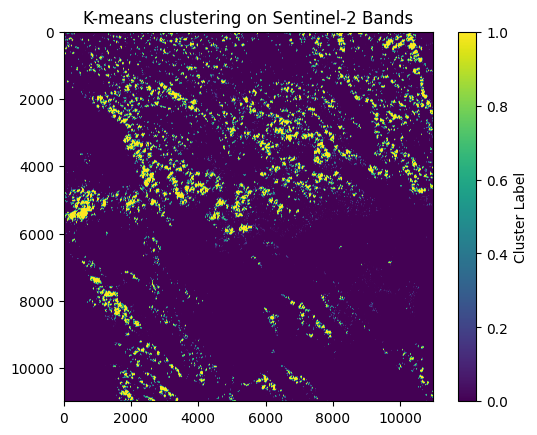

In [3]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the base path to extract band data
base_path = "/content/drive/MyDrive/AI4EO/Sentinel-2_file/S2B_MSIL1C_20240509T031519_N0510_R118_T48NUG_20240509T054534.SAFE/GRANULE/L1C_T48NUG_A037467_20240509T033006/IMG_DATA/" # You need to specify the path
bands_paths = {
    # Define the bands - in this case, we use blue, green and red (see my separate diagram for which bands correspond to which colour)
    'B4': base_path + 'T48NUG_20240509T031519_B04.jp2',
    'B3': base_path + 'T48NUG_20240509T031519_B03.jp2',
    'B2': base_path + 'T48NUG_20240509T031519_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()